In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import warnings
warnings.filterwarnings("ignore")

# Converts array to column vector.
def col(x):
    return np.array(np.matrix(x)).T

# Outlier Detection: Real greenhouse data

Temperature $T$ measurements (units in °C), relative humidity $H$ (units in %), and $\text{CO}_2$ $C$ (parts per million) measurements in a real rose cultivation greenhouse are modeled as continuous random variables through the random vector $Z = [T;H;C]^T$. It is desired to design an automatic detection system based on MLE that generates an alarm when an anomalous measurement occurs. For this, 300 joint observations of the temperature $T$ (first column), humidity $H$ (second column), and $\text{CO}_2$ $C$ (third column) variables are provided in the file *greenhouse3d.txt*.


## Part 1


#### a) We make a 3-dimensional plot of the temperature vs humidity vs $\text{CO}_2$ observations, and visually inspect the data.


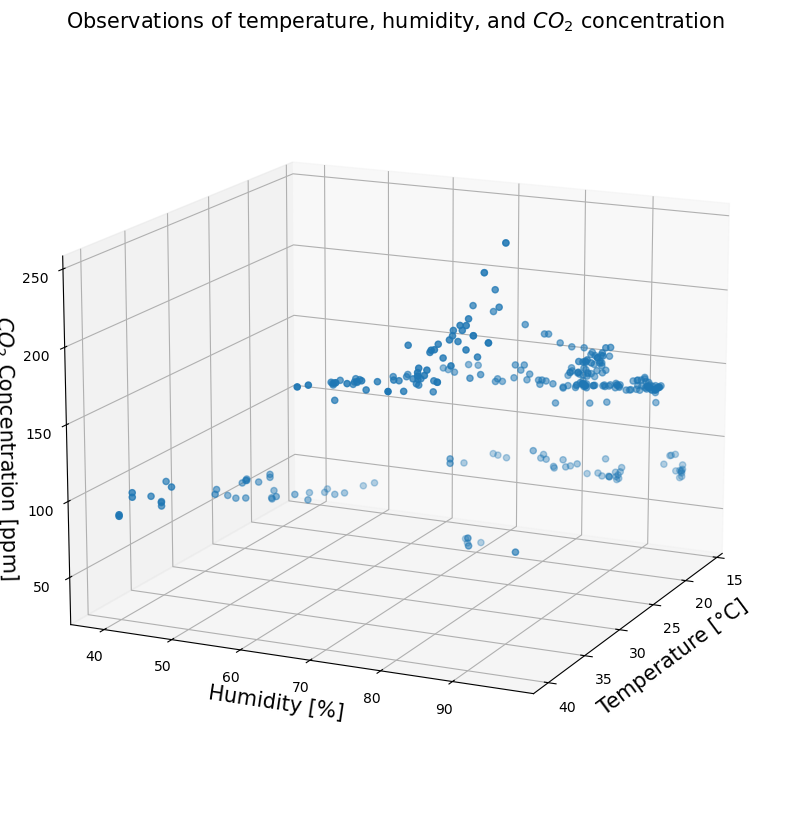

interactive(children=(IntSlider(value=0, description='E', max=90, min=-90, step=5), IntSlider(value=0, descrip…

In [7]:
# Import data from the .txt
filename1 = 'Greenhouse data/greenhouseData3d.txt'
T = np.loadtxt(filename1)[:, 0]
H = np.loadtxt(filename1)[:, 1]
C = np.loadtxt(filename1)[:, 2]

# Create the figure
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')

# Plot the values
ax.scatter(T, H, C, marker='o')
ax.view_init(elev=15, azim=25)
ax.set_xlabel(r'Temperature [°C]', fontsize=15)
ax.set_ylabel(r'Humidity [%]', fontsize=15)
ax.set_zlabel(r'$CO_2$ Concentration [ppm]', fontsize=15)
ax.set_title(r'Observations of temperature, humidity, and $CO_2$ concentration', fontsize=15)

plt.show()

def plotter(E, A):
    fig = plt.figure(figsize=[12, 8])
    ax = fig.add_subplot(projection='3d') # Set up the 3d axis as a 3D plot
    ax.scatter(T, H, C, cmap=cm.coolwarm)
    ax.set_xlabel(r'Temperature [°C]', fontsize=15)
    ax.set_ylabel(r'Humidity [%]', fontsize=15)
    ax.set_zlabel(r'$CO_2$ Concentration [ppm]', fontsize=15)
    ax.set_title(r'Observations of temperature, humidity, and $CO_2$ concentration', fontsize=15)
    ax.view_init(elev=E, azim=A)
    plt.show()


from ipywidgets import interactive
iplot = interactive(plotter,
                    E=(-90, 90, 5), 
                    A=(-90, 90, 5)
                    )
iplot


A high concentration of data can be noticed around 20°C and 25°C of temperature, 70% and 90% humidity, and between 100 and 150 ppm of carbon dioxide concentration. There is also another zone of high data concentration for temperatures between 20°C and 36°C, for carbon dioxide concentrations below 100 ppm, and relative humidity between 40% and 60%.


#### b) We now estimate the best Gaussian distribution of Z using MLE, and indicate the resulting function (i.e., a single Gaussian).


In [8]:
# Estimation of mean vector using MLE

# We create vectors in the form z = [T, H, C]^T where T is temperature, H is humidity, and C is CO2 concentration. We place them in a matrix THC of 3xlen(T), where len(T) = len(H) = len(C).
THC = np.zeros((3, len(T)))
n, m = np.shape(THC)

# Fill the THC matrix
for i in range(m):
    THC[0, i] = T[i]
    THC[1, i] = H[i]
    THC[2, i] = C[i]

# Create the estimation of mean mu_Z
mu_Z = np.zeros((3,1))
for i in range(m):
    mu_Z = mu_Z + col(THC[:, i])
mu_Z = mu_Z/m
print(f'Estimation of mean mu_Z: \n {mu_Z}\n')

# Create the estimation of covariance matrix Q_Z
Q_Z = np.zeros((3,3))
for i in range(m):
    Q_Z = Q_Z + (col(THC[:,i])-mu_Z)@(col(THC[:,i])-mu_Z).T
Q_Z = Q_Z/(m-1)
print(f'Estimation of covariance matrix Q_Z: \n {Q_Z}\n')


Mean estimation mu_Z: 
 [[ 24.00886667]
 [ 79.002     ]
 [137.50666667]]

Covariance matrix estimation Q_Z: 
 [[  24.08500339  -63.56876696   22.11368651]
 [ -63.56876696  224.22534716  167.39396656]
 [  22.11368651  167.39396656 1753.66885173]]



#### c) We now determine the decision threshold that defines the detection. That is, given a new observation $z \in \mathbb{R}^3$, it is considered as an anomalous data point if $f_Z(z) < \gamma$. One way to do this is to generate uniform random data points within a box that encloses the observations from the greenhouse database, and color those that are considered anomalous according to the decision rule differently.


We have
$$f_Z(z) = \frac{1}{2\pi\sqrt{\text{det}(\hat{Q}_Z)}}\exp\left({-\frac{1}{2}(z-\mu_Z)^T\hat{Q}_Z^{-1}(z-\mu_Z)}\right)$$
We define the decision rule for typical observations as:
$$f_Z(z) \geq \gamma$$
We define the decision rule for anomalous observations as:
$$f_Z(z) < \gamma$$


In [9]:
def gauss(x, mu, Cx):
    n = np.shape(Cx)[0]
    return float((1/(np.sqrt((2*np.pi)**(n)*(np.linalg.det(Cx)))))*np.exp((-1/2)*(np.transpose(x-mu)@np.linalg.inv(Cx))@(x-mu)))

# Temperature samples
samplesT = np.random.uniform(15, 40, 1000)

# Humidity samples
samplesH = np.random.uniform(40, 100, 1000)

# CO2 samples
samplesC = np.random.uniform(0, 230, 1000)

# To define the value of gamma, we will evaluate the data we have in the Gaussian that was estimated with 
# MLE and we will look at the highest values it returns, in order to  establish gamma at a value close to that.
values = []
for i in range(m):
    z = col(THC[:,i])
    val = gauss(z, mu_Z, Q_Z)
    values.append(val)

# Minimum value of the Gaussian function
print(f'Minimum value of the Gaussian function: {np.min(values)}')
# Maximum value of the Gaussian function
print(f'Maximum value of the Gaussian function: {np.max(values)}')
# Definition of gamma
gamma = 4.7e-9
print(f'Chosen gamma: {gamma}')


Minimum value of the Gaussian function: 4.738645728434425e-09
Maximum value of the Gaussian function: 5.5723504679095906e-05
Chosen gamma: 4.7e-09


In [10]:
# Plot a box of uniform samples around the real data.
def plotter2(E, A):
    fig = plt.figure(figsize=[12, 8])
    ax = fig.add_subplot(projection='3d') # Set up the 3d axis as a 3D plot
    ax.scatter(T, H, C, cmap=cm.coolwarm, c='k')
    ax.scatter(samplesT, samplesH, samplesC, cmap=cm.coolwarm)
    ax.set_xlabel(r'Temperature [°C]', fontsize=15)
    ax.set_ylabel(r'Humidity [%]', fontsize=15)
    ax.set_zlabel(r'$CO_2$ Concentration [ppm]', fontsize=15)
    ax.set_title(r'Temperature, humidity, and $CO_2$ concentration data', fontsize=15)
    ax.view_init(elev=E, azim=A)
    plt.show()

from ipywidgets import interactive
iplot = interactive(plotter2,
                    E=(-90, 90, 5), 
                    A=(-90, 90, 5)
                    )
iplot


interactive(children=(IntSlider(value=0, description='E', max=90, min=-90, step=5), IntSlider(value=0, descrip…

In [11]:
# Create vectors of uniform samples of the form z = [T, H, C]^T where T is temperature, H is humidity, and C is CO2 concentration. We will place them in a matrix THC2 of 3xlen(T), where len(T) = len(H) = len(C).
THC2 = np.zeros((3, len(samplesT)))
n2, m2 = np.shape(THC2)

# Fill the THC2 matrix
for i in range(m2):
    THC2[0, i] = samplesT[i]
    THC2[1, i] = samplesH[i]
    THC2[2, i] = samplesC[i]

# Create lists to save the data detected as typical and anomalous.
typicalT = []
typicalH = []
typicalC = []
anomalousT = []
anomalousH = []
anomalousC = []

# Apply the decision rule for the data from the uniform samples.
for i in range(m2):
    z = col(THC2[:,i])
    if gauss(z, mu_Z, Q_Z) >= gamma:
        typicalT.append(z[0])
        typicalH.append(z[1])
        typicalC.append(z[2])
    else:
        anomalousT.append(z[0])
        anomalousH.append(z[1])
        anomalousC.append(z[2])

# Plot the fault detection for the uniform data.
def plotter3(E, A):
    fig = plt.figure(figsize=[12, 8])
    ax = fig.add_subplot(projection='3d') # Set up the 3d axis as a 3D plot
    ax.scatter(typicalT, typicalH, typicalC, c='g', label='Typical Observations')
    ax.scatter(anomalousT, anomalousH, anomalousC, c='k', label='Anomalous Observations')
    ax.scatter(T, H, C, c='b', cmap=cm.coolwarm, label='Real Observations')
    ax.set_xlabel(r'Temperature [°C]', fontsize=15)
    ax.set_ylabel(r'Humidity [%]', fontsize=15)
    ax.set_zlabel(r'CO2 Concentration [ppm]', fontsize=15)
    ax.set_title(r'Temperature, humidity, and CO2 concentration data', fontsize=15)
    ax.view_init(elev=E, azim=A)
    plt.legend()
    plt.show()

from ipywidgets import interactive
iplot = interactive(plotter3,
                    E=(-90, 90, 5), 
                    A=(-90, 90, 5)
                    )
iplot


interactive(children=(IntSlider(value=0, description='E', max=90, min=-90, step=5), IntSlider(value=0, descrip…

#### d) We rewrite the decision rule in item b) through a quadratic form. That is, we find the constant $\alpha$ and the matrix $M$, such that, given an observation $z \in \mathbb{R}^3$, it is considered anomalous if $(z - \mu)^TM(z - \mu) > \alpha$.


In [12]:
# To find M and alpha, we will first look for which values of z the condition f_Z(z) >= gamma is met.
vals_greater = []
zetas = []

for i in range(m):
    z = col(THC[:,i])
    val = gauss(z, mu_Z, Q_Z)
    if val >= gamma:
        vals_greater.append(val)
        zetas.append(z)

# For those values of z, we look at the result of the operation (z-mu_Z)^T Q^-1 (z-mu_Z).
# The largest value returned by the operation will be alpha.
alphas = []
for j in range(len(zetas)):
    quad = np.round(float((zetas[j]-mu_Z).T @ np.linalg.inv(Q_Z) @ (zetas[j]-mu_Z)), 3)
    alphas.append(quad)

# Find the index of the z that generated that alpha to find the value of alpha.
index = alphas.index(np.max(alphas))
alpha = np.round(float((zetas[index]-mu_Z).T @ np.linalg.inv(Q_Z) @ (zetas[index]-mu_Z)), 3)
print(f'alpha = {alpha}')


alpha = 18.885


Decision rule written as a quadratic form

Anomalous data point if
$$(z-\mu_Z)^TQ_Z^{-1}(z-\mu_Z) > 18.885$$
Which means that $M = Q_Z^{-1}$ and $\alpha = 18.885$


In [13]:
# These lines are run to check that this decision rule is equivalent to the first one.
# It is found that they are indeed equivalent, but there are certain differences in the decimals due to the numerical precision used.
# To test this, it is enough to print any of the lists typicalT2, typicalH2, or typicalC2 next to any of the
# lists typicalT, typicalH, or typicalC to see that they are equal.
typicalT2 = []
typicalH2 = []
typicalC2 = []
anomalousT2 = []
anomalousH2 = []
anomalousC2 = []

for i in range(m2):
    z = col(THC2[:,i])
    if np.round(float((z-mu_Z).T @ np.linalg.inv(Q_Z) @ (z-mu_Z)), 3) <= alpha:
        typicalT2.append(z[0])
        typicalH2.append(z[1])
        typicalC2.append(z[2])
    else:
        anomalousT2.append(z[0])
        anomalousH2.append(z[1])
        anomalousC2.append(z[2])


#### e) We now consider the new measurements inside the greenhouse in the file *newData_greenhouseData3d.txt*. Given the decision rule found in c) or d) (the rules in these statements are exactly the same but written in different forms), we determine the percentage of measurements that are anomalous.


In [15]:
# Import the data from the new .txt file.
filename2 = 'Greenhouse data/newData_greenhouseData3d.txt'
Tnuevos = np.loadtxt(filename2)[:, 0]
Hnuevos = np.loadtxt(filename2)[:, 1]
Cnuevos = np.loadtxt(filename2)[:, 2]

# Create vectors with the new data in the form z = [T, H, C]^T where T is temperature, H is humidity, and C is CO2 concentration. We will place them in a 3xlen(T) matrix THC3, where len(T) = len(H) = len(C).
THC3 = np.zeros((3, len(Tnuevos)))
n3, m3 = np.shape(THC3)

# Fill the THC3 matrix
for i in range(m3):
    THC3[0, i] = Tnuevos[i]
    THC3[1, i] = Hnuevos[i]
    THC3[2, i] = Cnuevos[i]

# Apply the decision rule for the new data.
# Create two lists: one for observations considered normal and another for observations considered anomalous.
normales = []
anomalas = []
for i in range(m3):
    z = col(THC3[:,i])
    expr2 = gauss(z, mu_Z, Q_Z)
    if expr2 >= gamma:
        normales.append(z)
    else:
        anomalas.append(z)

percent_anomalas = np.round(len(anomalas)/(len(anomalas) + len(normales)), 4)
print(f'Percentage of anomalous measurements: {percent_anomalas*100}%')


Percentage of anomalous measurements: 65.0%


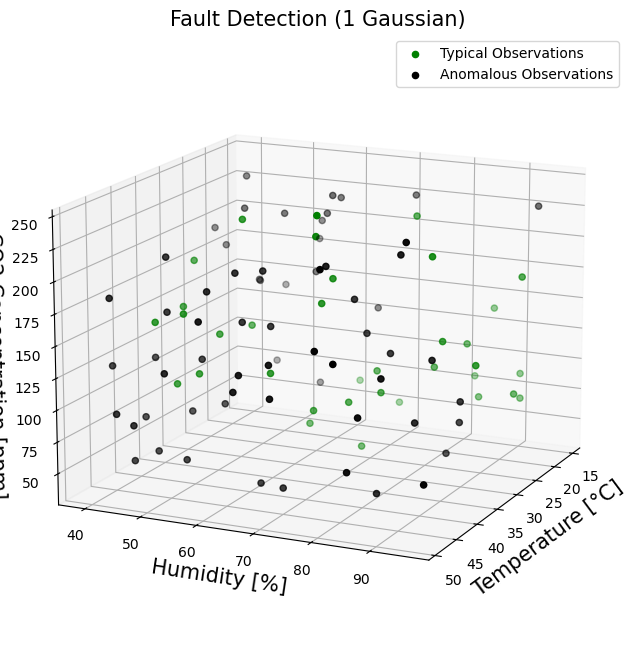

interactive(children=(IntSlider(value=0, description='E', max=90, min=-90, step=5), IntSlider(value=0, descrip…

In [16]:
# The same procedure as the previous cell is performed for the new data, but this time to plot them in R^3.
typicalT3 = []
typicalH3 = []
typicalC3 = []
anomalousT3 = []
anomalousH3 = []
anomalousC3 = []

for i in range(m3):
    z = col(THC3[:,i])
    if gauss(z, mu_Z, Q_Z) >= gamma:
        typicalT3.append(z[0])
        typicalH3.append(z[1])
        typicalC3.append(z[2])
    else:
        anomalousT3.append(z[0])
        anomalousH3.append(z[1])
        anomalousC3.append(z[2])

fig = plt.figure(figsize=[12, 8])
ax = fig.add_subplot(projection='3d') # Set up the 3d axis as a 3D plot
ax.scatter(typicalT3, typicalH3, typicalC3, c='g', label='Typical Observations')
ax.scatter(anomalousT3, anomalousH3, anomalousC3, c='k', label='Anomalous Observations')
ax.view_init(elev=15, azim=25)
ax.set_xlabel(r'Temperature [°C]', fontsize=15)
ax.set_ylabel(r'Humidity [%]', fontsize=15)
ax.set_zlabel(r'CO2 Concentration [ppm]', fontsize=15)
ax.set_title(r'Fault Detection (1 Gaussian)', fontsize=15)
plt.legend()
plt.show()


def plotter4(E, A):
    fig = plt.figure(figsize=[12, 8])
    ax = fig.add_subplot(projection='3d') # Set up the 3d axis as a 3D plot
    ax.scatter(typicalT3, typicalH3, typicalC3, c='g', label='Typical Observations')
    ax.scatter(anomalousT3, anomalousH3, anomalousC3, c='k', label='Anomalous Observations')
    ax.set_xlabel(r'Temperature [°C]', fontsize=15)
    ax.set_ylabel(r'Humidity [%]', fontsize=15)
    ax.set_zlabel(r'CO2 Concentration [ppm]', fontsize=15)
    ax.set_title(r'Temperature, humidity, and CO2 concentration data', fontsize=15)
    ax.view_init(elev=E, azim=A)
    plt.legend()
    plt.show()

from ipywidgets import interactive
iplot = interactive(plotter4,
                    E=(-90, 90, 5), 
                    A=(-90, 90, 5)
                    )
iplot


#### f) We now repeat steps b), c), and e) with a distribution of the form $f_Z(z) = \sum_{k=1}^{3}\alpha_kN(z; \mu_k, Q_k)$, found with the EM algorithm. We compare the results of anomaly detection using a single Gaussian in statement e) with those obtained using a combination of Gaussians (for example, the percentage of samples detected as anomalous, a graph comparing the samples from the initial dataset using for running the EM algorithm with the samples considered anomalous, etc.).


In [17]:
# Function to create a new list of thetas (parameters), depending on the number of functions n that you want to combine.
def create_thetas(n):
    thetas = [[] for num in range(n)]
    return thetas


### EM algorithm definition

In [18]:
# Inputs
# maxIt: maximum iterations allowed for the algorithm.
# tol: tolerance of the algorithm for the termination condition.
# k: number of Gaussian functions to be combined.
# thetak0: list of thetak parameters, each element of the list is a list containing a mean and a covariance matrix.
# alphak: list of alphak parameters, each element of the list is a value of alpha.
# data: array of the data for which the composite density function is to be found. They are entered in the form of a matrix where each row is a data point and each column is a component of the data.

# Outputs
# thetak_final: array of parameters of the combined functions that form the composite function that best fits the data.
# alphak_final: array of weights of the combined functions that form the composite function that best fits the data.
# c: Number of iterations it took for the algorithm
def EM(maxIt, tol, k, thetak0, alphak, data):

    c = 0 # Counter for the while loop.
    m = len(data) # Number of data points.
    Y = np.zeros((m,len(thetak0))) # Gamma matrix: each column corresponds to each gamma_k.
    norma = 100 # Norm for the termination condition.
    regu = 0.01*np.eye(3)  # Regularization parameter.

    while(c < maxIt and norma > tol ):

        # E-Step
        den = 0
        for r in range(len(thetak0)):
            Nm = np.zeros((m, 1))
            for i in range(m):
                Nm[i] = gauss(col(data[i]), thetak0[r][0], thetak0[r][1] + regu)
            den = den + alphak[r]*Nm

        num = 0
        for r in range(len(thetak0)):
            Nm = np.zeros((m, 1))
            for i in range(m):
                Nm[i] = gauss(col(data[i]), thetak0[r][0], thetak0[r][1] + regu)
            num = alphak[r]*Nm
            Y[:,r] = col(np.divide(num, den)) # Filling the gamma matrix.

        # M-Step

        # In this loop, Nk is calculated
        Nk = []
        suma = 0
        for j in range(len(thetak0)):
            suma = 0
            for i in range(m):
                suma = suma + Y[:,j][i]
            Nk.append(suma)

        # In this loop, alphak is calculated
        alphak = []
        for i in range(len(thetak0)):
            alphak.append(Nk[i]/m)

        # In this loop, the new means (muk) are calculated.
        muk = []
        suma = 0
        for j in range(len(thetak0)):
            suma = 0
            for i in range(m):
                suma = suma + Y[:,j][i]*col(data[i])
            muk.append(suma/Nk[j])

        # In this loop, the new covariance matrices (Ck) are calculated.
        Ck = []
        suma = 0
        for j in range(len(thetak0)):
            suma = 0
            for i in range(m):
                dato = col(data[i])
                suma = suma + Y[:,j][i]*(dato-muk[j])@(dato-muk[j]).T
            Ck.append(suma/Nk[j])

        # A new list of thetas is created, to then save the ones found in the current iteration.
        thetak_new = create_thetas(len(thetak0))
        for i in range(len(thetak0)):
            thetak_new[i].append(muk[i])
            thetak_new[i].append(Ck[i])

        # The difference between the new and previous parameters is calculated and its norm is calculated to know if they have similar values.
        norma = np.linalg.norm(thetak_new[0][0] - thetak0[0][0])

        # The "new" value of thetak will now be used in the next iteration.
        thetak0 = thetak_new
        c+=1        

    # When one of the termination conditions is met (iterations or norm).
    thetak_final = thetak0
    alphak_final = alphak

    return thetak_final, alphak_final, c


### Combination of 3 Gaussians

In [19]:
# Initial conditions
k = 3

mu1 = np.array([[30], [75], [160]])
mu2 = np.array([[20], [90], [150]])
mu3 = np.array([[30], [50], [75]])

C1 = 100*np.eye(3)
C2 = 100*np.eye(3)
C3 = 100*np.eye(3)

thetak = []
theta1 = [mu1, C1]
theta2 = [mu2, C2]
theta3 = [mu3, C3]

thetak.append(theta1)
thetak.append(theta2)
thetak.append(theta3)

alphak = []
alpha1 = 1/3
alpha2 = 1/3
alpha3 = 1/3

alphak.append(alpha1)
alphak.append(alpha2)
alphak.append(alpha3)

maxIterations = 1000
tolerance = 10**-5

THC_data = THC.T

# Algorithm is run
params3, alphas3, iterations3 = EM(maxIterations, tolerance, k, thetak, alphak, THC_data)

print(f'Number of iterations: {iterations3}\n')
print(f'Mean of the first function:\n{params3[0][0]}\n')
print(f'Covariance matrix of the first function:\n{params3[0][1]}\n')
print(f'alpha_1 = {np.round(alphas3[0], 3)}')
print('--------------------\n')
print(f'Mean of the second function:\n{params3[1][0]}\n')
print(f'Covariance matrix of the second function:\n{params3[1][1]}\n')
print(f'alpha_2 = {np.round(alphas3[1], 3)}')
print('--------------------\n')
print(f'Mean of the third function:\n{params3[2][0]}\n')
print(f'Covariance matrix of the third function:\n{params3[2][1]}\n')
print(f'alpha_3 = {np.round(alphas3[2], 3)}')


Number of iterations: 67

Mean of the first function:
[[ 26.89850031]
 [ 75.62308269]
 [174.15675368]]

Covariance matrix of the first function:
[[ 12.59551659 -25.27187825  -5.98668459]
 [-25.27187825  87.20702712  45.94745505]
 [ -5.98668459  45.94745505 360.02432232]]

alpha_1 = 0.35
--------------------

Mean of the second function:
[[ 20.96577645]
 [ 89.70080267]
 [149.44768475]]

Covariance matrix of the second function:
[[  1.12256265  -4.78918118   2.14207656]
 [ -4.78918118  24.47405995 -12.29859047]
 [  2.14207656 -12.29859047  23.98318288]]

alpha_2 = 0.36
--------------------

Mean of the third function:
[[24.29097768]
 [69.81815705]
 [78.4196685 ]]

Covariance matrix of the third function:
[[  44.51189173 -127.23553791   14.34698823]
 [-127.23553791  394.80945665  -16.42300817]
 [  14.34698823  -16.42300817  271.11040297]]

alpha_3 = 0.29


In [20]:
# To define the value of gamma, we are going to evaluate the original data in the Gaussian mixture estimated with the EM algorithm and we are going to look at the smallest values it returns, in order to 
# establish gamma close to that value.
combination_values = []
for i in range(m):
    z = col(THC[:,i])
    val = alphas3[0]*gauss(z, params3[0][0], params3[0][1]) + alphas3[1]*gauss(z, params3[1][0], params3[1][1]) + alphas3[2]*gauss(z, params3[2][0], params3[2][1])
    combination_values.append(val)

# Minimum value of the Gaussian function
print(f'Minimum value of the Gaussian mixture: {np.min(combination_values)}')
# Maximum value of the Gaussian function
print(f'Maximum value of the Gaussian mixture: {np.max(combination_values)}')
# Definition of gamma
gamma2 = 1.04e-8
print(f'Chosen gamma: {gamma2}')


Minimum value of the Gaussian mixture: 1.0448626461390372e-08
Maximum value of the Gaussian mixture: 0.0020960541415260096
Chosen gamma: 1.04e-08


In [21]:
# We apply the decision rule for the new data.
# We create two lists: one for the observations considered as normal and another for the observations considered as anomalous.
normal2 = []
anomalous2 = []
for i in range(m3):
    z = col(THC3[:,i])
    expr2 = alphas3[0]*gauss(z, params3[0][0], params3[0][1]) + alphas3[1]*gauss(z, params3[1][0], params3[1][1]) + alphas3[2]*gauss(z, params3[2][0], params3[2][1])
    if expr2 >= gamma2:
        normal2.append(z)
    else:
        anomalous2.append(z)

percent_anomalies2 = np.round(len(anomalous2)/(len(anomalous2) + len(normal2)), 2)
print(f'Percentage of anomalous measurements: {percent_anomalies2*100}%')


Percentage of anomalous measurements: 67.0%


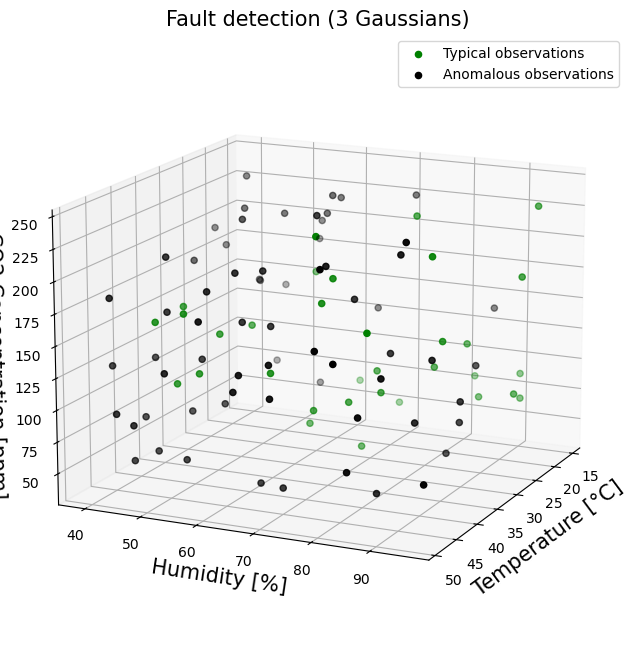

interactive(children=(IntSlider(value=0, description='E', max=90, min=-90, step=5), IntSlider(value=0, descrip…

In [23]:
# The same procedure as before is performed, but now to visualize the results in R^3.
typical_TEM = []
typical_HEM = []
typical_CEM = []
anomalous_TEM = []
anomalous_HEM = []
anomalous_CEM = []

for i in range(m3):
    z = col(THC3[:,i])
    if alphas3[0]*gauss(z, params3[0][0], params3[0][1]) + alphas3[1]*gauss(z, params3[1][0], params3[1][1]) + alphas3[2]*gauss(z, params3[2][0], params3[2][1]) >= gamma2:
        typical_TEM.append(z[0])
        typical_HEM.append(z[1])
        typical_CEM.append(z[2])
    else:
        anomalous_TEM.append(z[0])
        anomalous_HEM.append(z[1])
        anomalous_CEM.append(z[2])

fig = plt.figure(figsize=[12, 8])
ax = fig.add_subplot(projection='3d')  # Set up the 3d axis as a 3D plot
ax.scatter(typical_TEM, typical_HEM, typical_CEM, c='g', label='Typical observations')
ax.scatter(anomalous_TEM, anomalous_HEM, anomalous_CEM, c='k', label='Anomalous observations')
ax.view_init(elev=15, azim=25)
ax.set_xlabel('Temperature [°C]', fontsize=15)
ax.set_ylabel('Humidity [%]', fontsize=15)
ax.set_zlabel('CO2 Concentration [ppm]', fontsize=15)
ax.set_title('Fault detection (3 Gaussians)', fontsize=15)
plt.legend()
plt.show()

def plotter5(E, A):
    fig = plt.figure(figsize=[12, 8])
    ax = fig.add_subplot(projection='3d')  # Set up the 3d axis as a 3D plot
    ax.scatter(typical_TEM, typical_HEM, typical_CEM, c='g', label='Typical observations')
    ax.scatter(anomalous_TEM, anomalous_HEM, anomalous_CEM, c='k', label='Anomalous observations')
    ax.set_xlabel('Temperature [°C]', fontsize=15)
    ax.set_ylabel('Humidity [%]', fontsize=15)
    ax.set_zlabel('CO2 Concentration [ppm]', fontsize=15)
    ax.set_title('Temperature, Humidity, and CO2 Concentration Data', fontsize=15)
    ax.view_init(elev=E, azim=A)
    plt.legend()
    plt.show()

from ipywidgets import interactive
iplot = interactive(plotter5,
                    E=(-90, 90, 5),
                    A=(-90, 90, 5)
                    )
iplot
